In [67]:
# Initial imports

import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
%matplotlib inline
import datetime
import yfinance as yf
import seaborn as sns

# import all the plot libs 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from panel import widgets
from panel.interact import interact

In [4]:
# Load .env enviroment variables

load_dotenv('.env')

True

In [5]:
# Reading sp_500 data with yfinance with dates 1/3/2020 to 10/2/2020. ^GSPC is the symbol for S&P 500 in yahoo finance.

stock = '^GSPC'
sp_500_df = yf.download(stock,'2020-01-03', '2020-10-02')
sp_500_df = pd.DataFrame(sp_500_df)
sp_500_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [6]:
# Dropping all the S&P 500 columns except for the close price 

sp_500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True)
sp_500_df.head()

,Close
Date,
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
2020-01-09,3274.699951


In [7]:
# Calculating the percent change per day

sp_500_daily_returns = sp_500_df.pct_change()
sp_500_daily_returns.head()

,Close
Date,
2020-01-03,NaN
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902
2020-01-09,0.006655


In [8]:
# Getting the USA Coronavirus data csv by reading the usa covid cases csv

US_csv = Path('usa covid cases.csv')
#US_csv = Path("Vanguard-Group/usa covid cases.csv")
US_coronavirus_data = pd.read_csv(US_csv, parse_dates = True, infer_datetime_format = True)
US_coronavirus_data.head()

,Date,Confirmed,Deaths
0,1/22/2020,0,0
1,1/22/2020,0,0
2,1/22/2020,0,0
3,1/22/2020,0,0
4,1/22/2020,0,0


In [10]:
# Group the USA Coronavirus data by date

US_coronavirus_data = US_coronavirus_data.groupby(['Date']).sum()
US_coronavirus_data.head()

,Confirmed,Deaths
Date,,
1/22/2020,1,0
1/23/2020,1,0
1/24/2020,2,0
1/25/2020,2,0
1/26/2020,5,0


In [11]:
# Changing the date column to_datetime format and making it as the index

US_coronavirus_data.index = pd.to_datetime(US_coronavirus_data.index)
US_coronavirus_data.head()

,Confirmed,Deaths
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0


In [12]:
# Calculating the percent change for the US Coronavirus Data by day

US_coronavirus_data_returns = US_coronavirus_data.pct_change()
US_coronavirus_data_returns.tail()

,Confirmed,Deaths
Date,,
2020-07-05,0.017557,0.002090
2020-07-06,0.015549,0.002501
2020-07-07,0.020443,0.009172
2020-07-08,0.019559,0.006237
2020-07-09,0.020705,0.007483


In [13]:
# Combining the two data frames by using concat: sp_500_daily_returns and US_coronavirus_data_returns

combined_US_returns = pd.concat([sp_500_daily_returns, US_coronavirus_data_returns], axis='columns', join='inner')
combined_US_returns.head()

,Close,Confirmed,Deaths
Date,,,
2020-01-22,0.000289,NaN,NaN
2020-01-23,0.001141,0.0,NaN
2020-01-24,-0.009042,1.0,NaN
2020-01-27,-0.015731,0.0,NaN
2020-01-28,0.010054,0.0,NaN


In [14]:
# Drop all Null values in the combined USA data and renaming the columns

combined_US_returns.rename(columns={'Deaths' : 'USA Deaths', 'Confirmed' : 'USA Confirmed', 'Close' : 'S&P 500 Close Price'}, inplace = True)
combined_US_returns.dropna(inplace = True)

In [48]:
# Plot a line chart for the combined_US_returns data
combined_US_returns['Date'] = combined_US_returns.index
combined_US_returns.hvplot(kind='line',x='Date', y=['USA Confirmed','USA Deaths','S&P 500 Close Price'], ylim=(0, 1500), title='USA Confirmed/Deaths vs S&P Close Price')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

,S&P 500 Close Price,USA Confirmed,USA Deaths
S&P 500 Close Price,1.000000,0.051573,0.019359
USA Confirmed,0.051573,1.000000,0.958285
USA Deaths,0.019359,0.958285,1.000000


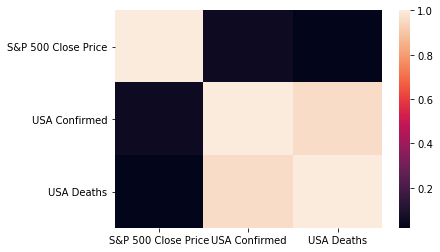

In [17]:
# # Plotting a heat map for the USA correlation

US_correlation = combined_US_returns.corr()
sns.heatmap(US_correlation)
US_correlation

In [21]:
###### KEVIN BRANCH

In [18]:
# Getting the India Coronavirus Data by reading the India Cases Covid csv

#India_csv = Path('Vanguard-Group/India Cases Covid.csv')
India_csv = Path('India Cases Covid.csv')
India_coronavirus_data = pd.read_csv(India_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
India_coronavirus_data.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3


In [19]:
# Dropping the India Coronavirus columns and leaving only the Deaths and Confirmed columns. Also renaming the columns.

India_coronavirus_data.drop(columns = ['Sno','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured'], inplace = True)
India_coronavirus_data.rename(columns={'Deaths' : 'India Deaths', 'Confirmed' : 'India Confirmed'}, inplace = True)

In [20]:
# Checking if there are any null values in the data

India_coronavirus_data.isnull().sum()

India Deaths       0
India Confirmed    0
dtype: int64

In [21]:
# Grouping the India Cornonvirus Data by date 

India_coronavirus_data = India_coronavirus_data.groupby([India_coronavirus_data.index]).sum()
India_coronavirus_data.head()

,India Deaths,India Confirmed
Date,,
2020-01-30,0,1
2020-01-31,0,1
2020-02-01,0,2
2020-02-02,0,3
2020-02-03,0,3


In [22]:
# Generate a percent change by day for the India Coronavirus data

India_coronavirus_data_returns = India_coronavirus_data.pct_change()
India_coronavirus_data_returns.head()

,India Deaths,India Confirmed
Date,,
2020-01-30,NaN,NaN
2020-01-31,NaN,0.0
2020-02-01,NaN,1.0
2020-02-02,NaN,0.5
2020-02-03,NaN,0.0


In [23]:
# Reading SENSEX data with yfinance with dates 1/3/2020 to 10/2/2020. ^BSESN is the symbol for SENSEX in yahoo finance.

stock = '^BSESN'
sensex = yf.download(stock,'2020-01-01', '2020-10-02')
sensex_df = pd.DataFrame(sensex)
sensex_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,41340.269531,41649.289062,41328.449219,41626.640625,41626.640625,5300
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700
2020-01-07,40983.039062,41230.140625,40727.371094,40869.468750,40869.468750,11900
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200


In [24]:
# Dropping all the SENSEX data columns except for the close price. Renaming the close price to SENESEX Close Price.

sensex_df.drop(columns =['Open','High','Low','Adj Close','Volume'], inplace = True)
sensex_df.rename(columns={'Close' : 'SENSEX Close Price'}, inplace = True)

In [25]:
# Generating a percent change by day for the SENSEX data

sensex_returns_df = sensex_df.pct_change()
sensex_returns_df.head()

,SENSEX Close Price
Date,
2020-01-02,NaN
2020-01-03,-0.003892
2020-01-06,-0.019004
2020-01-07,0.004741
2020-01-08,-0.001266


In [26]:
# Joining the sensex_df and the India_coronavirus_data by concat

india = pd.concat([sensex_returns_df, India_coronavirus_data_returns], join ='inner', axis = 'columns')

In [27]:
# Drop all the NULL values

india.dropna(inplace = True)

In [28]:
india.head()

,SENSEX Close Price,India Deaths,India Confirmed
Date,,,
2020-03-13,0.040434,inf,0.094595
2020-03-16,-0.079564,0.000000,0.036364
2020-03-17,-0.025836,0.500000,0.201754
2020-03-18,-0.055907,0.000000,0.102190
2020-03-19,-0.020135,0.333333,0.145695


In [47]:
# Plotting a line graph for the india data 

india['Date'] = india.index
india.hvplot(kind='line',x='Date', y=['India Confirmed','India Deaths','SENSEX Close Price'], ylim = (-0.2, 0.6), title = 'India Confirmed/Deaths vs SENSEX Close Price')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

,SENSEX Close Price,India Deaths,India Confirmed
SENSEX Close Price,1.000000,0.072881,-0.069799
India Deaths,0.072881,1.000000,0.605887
India Confirmed,-0.069799,0.605887,1.000000


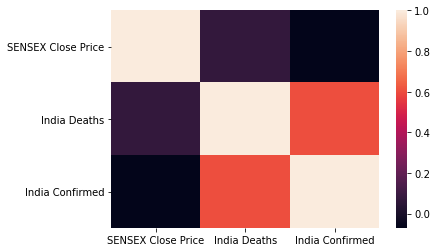

In [125]:
# Create a Heat map for the India Data Correlation 
india_correlation = india.corr()

sns.heatmap(india_correlation)
india_correlation

In [44]:
##### ROMAN BRANCH ######

In [31]:
# Getting the Brazil Coronavirus data by using the brazil_covid19.csv

Brazil_csv = Path('brazil_covid19.csv')
#Brazil_csv = Path("Vanguard-Group/brazil_covid19.csv")
Brazil_coronavirus_data = pd.read_csv(Brazil_csv, index_col = 'date', parse_dates = True, infer_datetime_format = True)
Brazil_coronavirus_data.head()

,region,state,cases,deaths
date,,,,
2020-02-25,Centro-Oeste,DF,0,0
2020-02-25,Centro-Oeste,GO,0,0
2020-02-25,Centro-Oeste,MS,0,0
2020-02-25,Centro-Oeste,MT,0,0
2020-02-25,Nordeste,AL,0,0


In [32]:
# Dropping the brazil coronavirus data columns (region & state) and renaming the columns

Brazil_coronavirus_data.drop(columns = ['region','state'], inplace = True)
Brazil_coronavirus_data.rename(columns={'deaths' : 'Brazil Deaths', 'cases' : 'Brazil Confirmed'}, inplace = True)

In [34]:
# Grouping the Brazil Coronavirus by date

Brazil_coronavirus_data = Brazil_coronavirus_data.groupby(Brazil_coronavirus_data.index).sum()
Brazil_coronavirus_data.head()

,Brazil Confirmed,Brazil Deaths
date,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0


In [35]:
# Make the Brazil data a percent change by the day

Brazil_coronavirus_returns = Brazil_coronavirus_data.pct_change()
Brazil_coronavirus_returns.head()

,Brazil Confirmed,Brazil Deaths
date,,
2020-02-25,NaN,NaN
2020-02-26,inf,NaN
2020-02-27,0.0,NaN
2020-02-28,0.0,NaN
2020-02-29,1.0,NaN


In [36]:
# Reading IBOVESPA data with yfinance with dates 1/3/2020 to 10/2/2020. ^BVSP is the symbol for IBOVESPA in yahoo finance.

stock = '^BVSP'
brazil_df = yf.download(stock,'2020-01-03', '2020-10-02')
IBOVESPA_df = pd.DataFrame(brazil_df)
IBOVESPA_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
2020-01-09,116248.0,116820.0,115411.0,115947.0,115947.0,5953500


In [37]:
# Drop all the IBOVESPA columns except for the Close column and rename the 'Close' price column as 'IBOVESPA Close Price'

IBOVESPA_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True, axis=1)
IBOVESPA_df.rename(columns={'Close' : 'IBOVESPA Close Price'}, inplace = True)

In [38]:
IBOVESPA_df.head()

,IBOVESPA Close Price
Date,
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
2020-01-09,115947.0


In [39]:
# Do a percent change by day for the IBOVESPA data

IBOVESPA_returns = IBOVESPA_df.pct_change()

In [40]:
IBOVESPA_returns.head()

,IBOVESPA Close Price
Date,
2020-01-03,NaN
2020-01-06,-0.007043
2020-01-07,-0.001848
2020-01-08,-0.003557
2020-01-09,-0.002581


In [41]:
# Combining the IBOVESPA returns data to the Brazil Coronavirus cases data

combined_Brazil_returns = pd.concat([IBOVESPA_returns, Brazil_coronavirus_returns], axis='columns', join='inner')
combined_Brazil_returns.head()

,IBOVESPA Close Price,Brazil Confirmed,Brazil Deaths
2020-02-27,-0.094097,0.0,NaN
2020-02-28,0.011536,0.0,NaN
2020-03-02,0.023548,0.0,NaN
2020-03-03,-0.010204,0.0,NaN
2020-03-04,0.015985,0.5,NaN


In [42]:
# Drop all the null values 

combined_Brazil_returns.dropna(inplace = True)
combined_Brazil_returns.head()

,IBOVESPA Close Price,Brazil Confirmed,Brazil Deaths
2020-03-17,0.048463,0.243590,inf
2020-03-18,-0.103488,0.470790,3.000000
2020-03-19,0.021481,0.450935,0.500000
2020-03-20,-0.018483,0.455717,0.833333
2020-03-23,-0.052170,0.223157,0.360000


In [46]:
# Plotting the Brazil Coronvirus data 

combined_Brazil_returns['Date'] = combined_Brazil_returns.index
combined_Brazil_returns.hvplot(kind='line',x='Date', y=['Brazil Confirmed','Brazil Deaths','IBOVESPA Close Price'], ylim = (-0.5, 2), title = 'Brazil Confirmed/Deaths vs IBOVESPA Close Price')


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

,IBOVESPA Close Price,Brazil Confirmed,Brazil Deaths
IBOVESPA Close Price,1.000000,-0.127437,-0.321546
Brazil Confirmed,-0.127437,1.000000,0.754432
Brazil Deaths,-0.321546,0.754432,1.000000


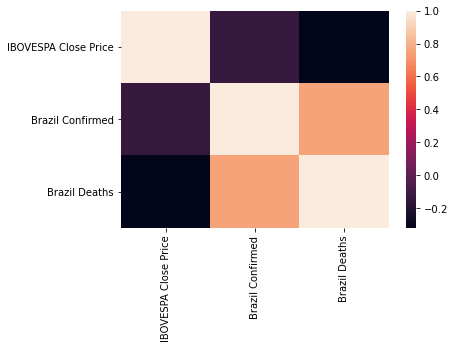

In [62]:
# Creating a Heatmap correlation for the data

brazil_correlation = combined_Brazil_returns.corr()

sns.heatmap(brazil_correlation)
brazil_correlation

In [95]:
#### VISUALIZATIONS FOR PRESENTATION ####
####
####
####
####
####

In [50]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = "pk.eyJ1IjoiYmpvcm5rc2hvZmZtYW4iLCJhIjoiY2tmb3FvOGllMXFnNzM4cXVhdGtuOWNrbSJ9.SreGTVzuAXW_9ELF07KkLA"

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [51]:
#Add locations and corona statistics for Mapbox visualization
mapbox_data = {'Country':  ['USA', 'India', 'Brazil'],
        'Latitude': [40.4251, 28.3907, -22.5410],
        'Longitude': [-74.0021, 77.1353, -43.1227],
        'Coronavirus Cases': [7.459, 6.685, 4.969],
        }

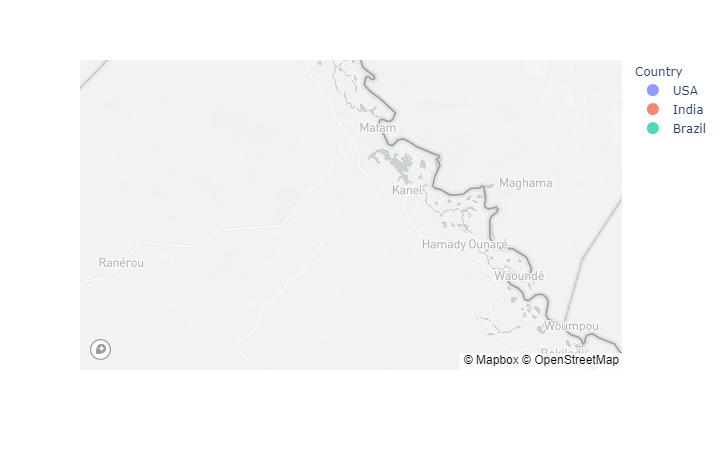

In [53]:
# Slice and plot data by name
map_1 = px.scatter_mapbox(
    mapbox_data,
    lat="Latitude",
    lon="Longitude",
    color="Country",
    size="Coronavirus Cases",
)
map_1.show()

In [55]:
#Visualizing graph of totoal cases 
global_daily_corona_raw = pd.concat([US_coronavirus_data, Brazil_coronavirus_data, India_coronavirus_data], axis='columns', join='inner')
global_daily_corona_raw.columns = [
'USA Confirmed',
'USA Deaths',
'Brazil Confirmed',
'Brazil Deaths',
'India Deaths',
'India Confirmed'
]
global_daily_corona_raw_clean = global_daily_corona_raw.dropna()
global_daily_corona_raw_clean.head()

,USA Confirmed,USA Deaths,Brazil Confirmed,Brazil Deaths,India Deaths,India Confirmed
2020-02-25,15,0,0,0,0,3
2020-02-26,15,0,1,0,0,3
2020-02-27,16,0,1,0,0,3
2020-02-28,16,0,1,0,0,3
2020-02-29,24,1,2,0,0,3


In [62]:
#global_daily_corona_raw_clean.plot(title = 'Global Corona Cases and Deaths Compared', figsize = (20,10))
global_daily_corona_raw_clean['Date'] = global_daily_corona_raw_clean.index
global_daily_corona_raw_clean.hvplot(kind='line',x='Date', y=['USA Confirmed', 'USA Deaths', 'Brazil Confirmed', 'Brazil Deaths', 'India Deaths', 'India Confirmed'], title='Total Confirmed/Deaths by Country')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [64]:
#Concat global coronavirus table
global_daily_corona = pd.concat([US_coronavirus_data_returns, Brazil_coronavirus_returns, India_coronavirus_data], axis='columns', join='inner')
global_daily_corona.columns = [
  'USA Confirmed',
  'USA Deaths',
  'Brazil Confirmed',
  'Brazil Deaths',
  'India Deaths',
  'India Confirmed',
]
global_daily_corona_clean = global_daily_corona.dropna()
global_daily_corona_clean.head()

,USA Confirmed,USA Deaths,Brazil Confirmed,Brazil Deaths,India Deaths,India Confirmed
2020-03-17,0.408486,0.350515,0.243590,inf,3,137
2020-03-18,0.452044,0.435115,0.470790,3.000000,3,151
2020-03-19,0.587642,0.409574,0.450935,0.500000,4,173
2020-03-20,366.528302,59.333333,0.455717,0.833333,4,223
2020-03-21,0.325787,0.259669,0.247788,0.636364,4,283


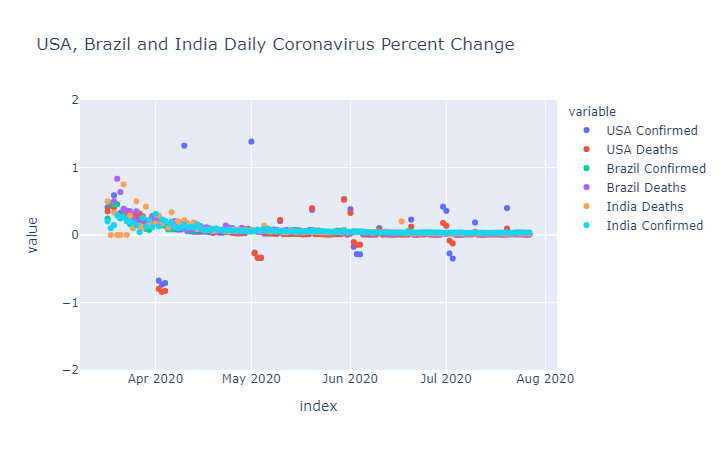

In [77]:
#Plot USA, Brazil and India Coronavirus Cases on same plot
scatter_global_daily_corona_clean = px.scatter((global_daily_corona_clean), range_y=(-2, 2), title = 'USA, Brazil and India Daily Coronavirus Percent Change')
scatter_global_daily_corona_clean

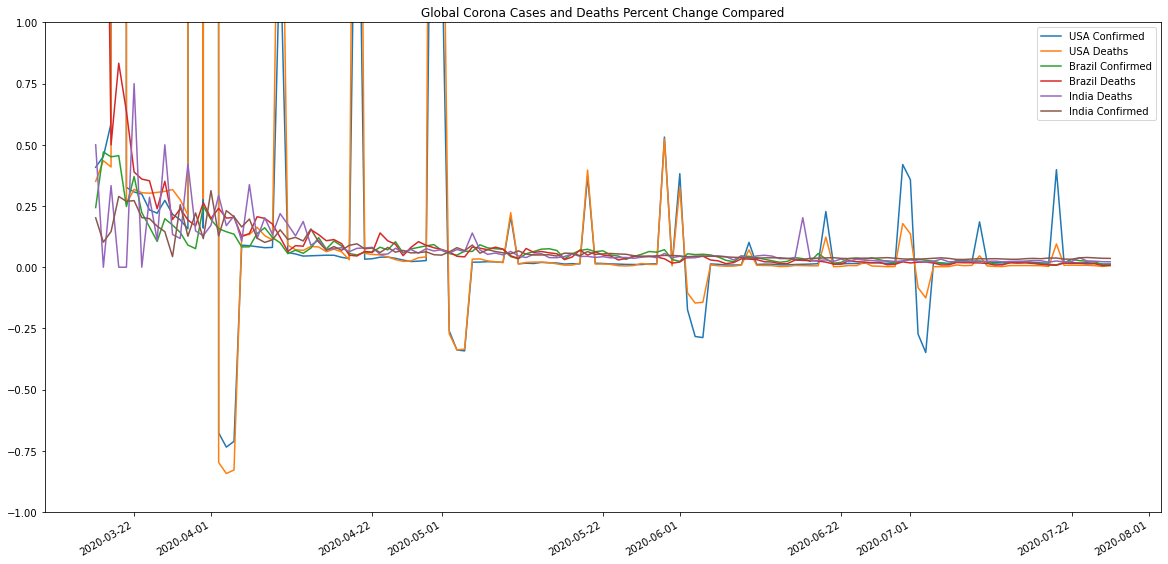

In [133]:
#Plot USA, Brazil and India Coronavirus Cases on same plot to show correllation between cases and deaths
global_daily_corona_clean.plot(kind = 'line', title = 'Global Corona Cases and Deaths Percent Change Compared', figsize = (20,10), ylim = (-1, 1))

In [64]:
#Creating a single spreadsheet with all market returns
global_daily_returns = pd.concat([sp_500_daily_returns, IBOVESPA_returns, sensex_df], axis='columns', join='inner')
global_daily_returns.columns = [
  'USA Stock Market',
  'Brazil Stock Market',
  'India Stock Market'  
]
global_daily_returns

,USA Stock Market,Brazil Stock Market,India Stock Market
Date,,,
2020-01-03,NaN,NaN,-0.003892
2020-01-06,0.003533,-0.007043,-0.019004
2020-01-07,-0.002803,-0.001848,0.004741
2020-01-08,0.004902,-0.003557,-0.001266
2020-01-09,0.006655,-0.002581,0.015547
...,...,...,...
2020-09-25,0.015977,-0.000134,0.022845
2020-09-28,0.016111,-0.024052,0.015860
2020-09-29,-0.004813,-0.011472,-0.000221


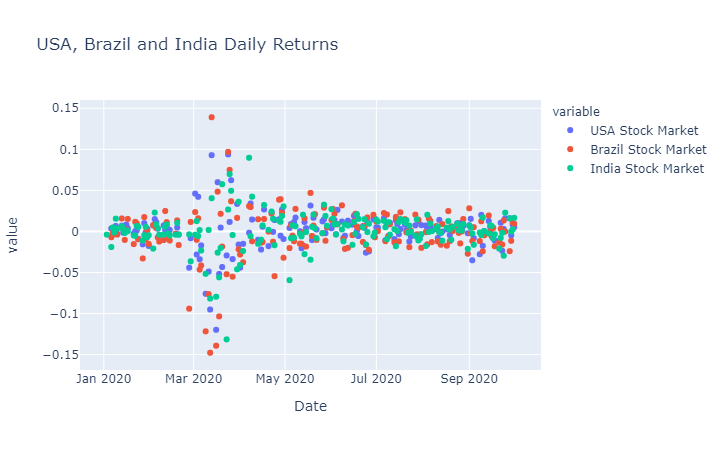

In [70]:
#Plot USA, Brazil and India Daily Returns on same plot
import plotly.express as px
scatter_global_daily_returns = px.scatter((global_daily_returns), title = 'USA, Brazil and India Daily Returns')
scatter_global_daily_returns

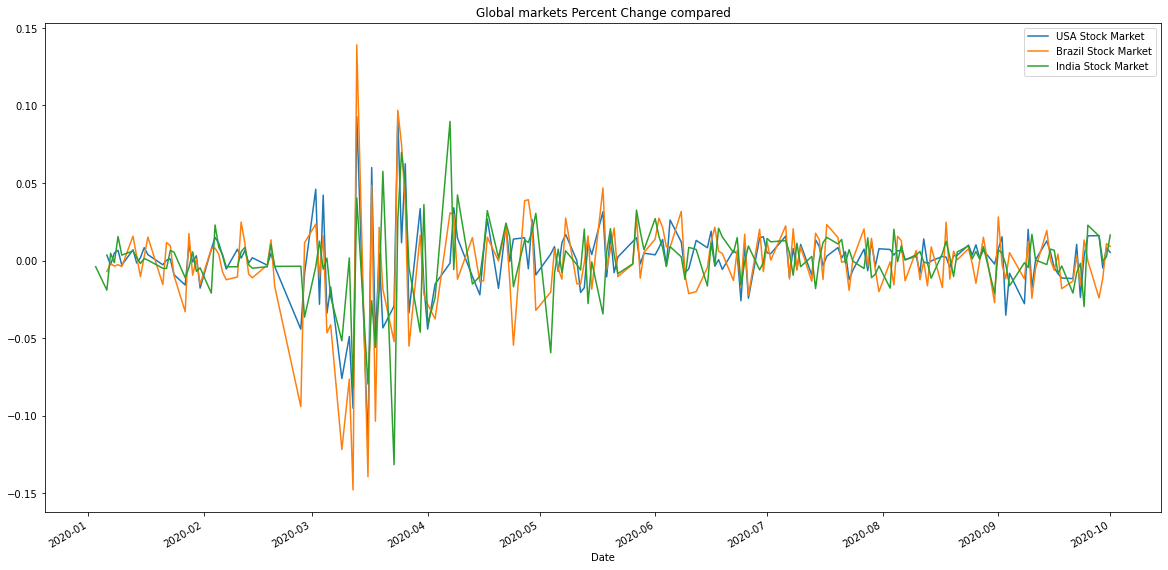

In [72]:
global_daily_returns.plot(title = 'Global markets Percent Change compared', figsize = (20,10))

In [143]:
#Concat all three correllations
correllation_df = pd.concat([US_correlation, brazil_correlation, india_correlation], axis='columns', join='outer')

#correllation_df.columns = [
 # 'US_correlation',
 # 'brazil_correlation',
 # 'india_correlation'
#]

In [148]:
correllation_df

,S&P 500 Close Price,USA Confirmed,USA Deaths,IBOVESPA Close Price,Brazil Confirmed,Brazil Deaths,SENSEX Close Price,India Deaths,India Confirmed
S&P 500 Close Price,1.000000,0.051573,0.019359,NaN,NaN,NaN,NaN,NaN,NaN
USA Confirmed,0.051573,1.000000,0.958285,NaN,NaN,NaN,NaN,NaN,NaN
USA Deaths,0.019359,0.958285,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
IBOVESPA Close Price,NaN,NaN,NaN,1.000000,-0.127437,-0.321546,NaN,NaN,NaN
Brazil Confirmed,NaN,NaN,NaN,-0.127437,1.000000,0.754432,NaN,NaN,NaN
Brazil Deaths,NaN,NaN,NaN,-0.321546,0.754432,1.000000,NaN,NaN,NaN
SENSEX Close Price,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.072881,-0.069799
India Deaths,NaN,NaN,NaN,NaN,NaN,NaN,0.072881,1.000000,0.605887
India Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,-0.069799,0.605887,1.000000


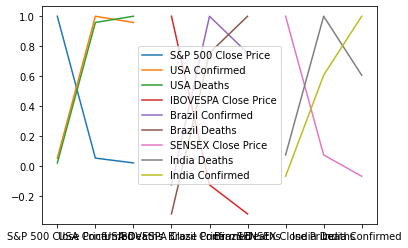

In [149]:
correllation_df.plot(kind = 'line')

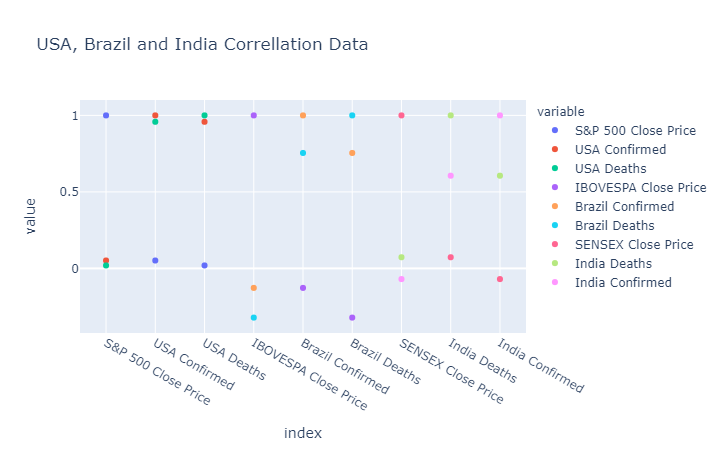

In [145]:
#Visualize all three correllations
correllation_df_scatter = px.scatter((correllation_df), title = 'USA, Brazil and India Correllation Data')
correllation_df_scatter

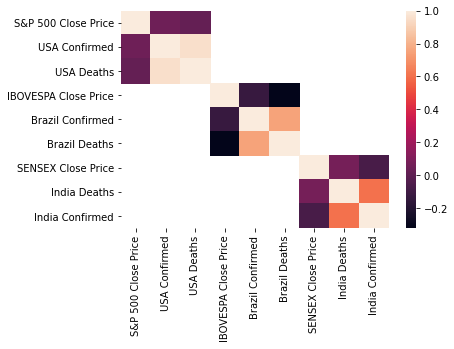

In [152]:
sns.heatmap(correllation_df)

In [73]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1.000000, 0.051573, 0.019359]
y = [1.000000, -0.127437, -0.321546]
#z = [1.000000, 0.072881, -0.069799]
# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Temp.", line_width=2)

# show the results
show(p)

In [71]:
#Combine all data into one dataframe for Monte Carlo Simulation

master_df = pd.concat([global_daily_corona_raw_clean, sp_500_df, IBOVESPA_df, sensex_df], axis='columns', join='inner')
master_df.head()

,USA Confirmed,USA Deaths,Brazil Confirmed,Brazil Deaths,India Deaths,India Confirmed,Date,Close,IBOVESPA Close Price,SENSEX Close Price
2020-02-27,16,0,1,0,0,3,2020-02-27,2978.760010,102984.0,39745.660156
2020-02-28,16,0,1,0,0,3,2020-02-28,2954.219971,104172.0,38297.289062
2020-03-11,1109,33,52,0,0,60,2020-03-11,2741.379883,85171.0,35697.398438
2020-03-12,1561,43,77,0,0,74,2020-03-12,2480.639893,72583.0,32778.140625
2020-03-13,2157,52,98,0,1,81,2020-03-13,2711.020020,82678.0,34103.480469


In [74]:
master_df_returns = master_df.pct_change()
master_df_returns_no_inf = master_df_returns.replace([np.inf, -np.inf], np.nan)
master_df_returns_clean = master_df_returns_no_inf.dropna()
master_df_returns_clean

TypeError: cannot perform __truediv__ with this index type: DatetimeIndex

In [180]:
master_df_returns_clean.mean()

USA Confirmed           0.091095
USA Deaths              0.146125
Brazil Confirmed        0.301349
Brazil Deaths           0.466555
India Deaths            0.485187
India Confirmed         0.384689
Close                   0.011900
IBOVESPA Close Price    0.021962
SENSEX Close Price      0.014566
dtype: float64

In [183]:
master_df_returns_clean.std()

USA Confirmed           0.509006
USA Deaths              0.809538
Brazil Confirmed        1.379014
Brazil Deaths           2.161943
India Deaths            2.338702
India Confirmed         1.825408
Close                   0.056233
IBOVESPA Close Price    0.100868
SENSEX Close Price      0.071810
dtype: float64

In [199]:
#Initialize Monte Carlo Simulation
num_simulations = 500
num_trading_days = 252
USA_mean_confirmed = .091095
USA_std_dev_confirmed = .509006
USA_Confirmed = master_df_returns_clean['USA Confirmed'][-1]

# Initialize empty dataframe
simulated_USA_confirmed_df = pd.DataFrame()


# Simulate the returns for 252 days, 500 times
for n in range(num_simulations):
    
    #Initialize the simulated prices list with the last closing price
    simulated_USA_confirmed = [USA_Confirmed]
    
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_confirmed = simulated_USA_confirmed[-1] * (1 + np.random.normal(USA_mean_confirmed, USA_std_dev_confirmed))
        # Append the simulated price to the list
        simulated_USA_confirmed.append(simulated_confirmed)
    # Create a DataFrame of the simulated prices
    simulated_USA_confirmed_df[f"Simulation {n+1}"] = pd.Series(simulated_USA_confirmed)

# Print head of DataFrame
simulated_USA_confirmed_df

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,0.020705,...,2.070482e-02,2.070482e-02,0.020705,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,2.070482e-02,0.020705,2.070482e-02
1,2.231850e-02,2.387596e-02,9.773053e-03,2.504519e-02,2.762239e-03,-3.564206e-03,3.481075e-02,3.223885e-02,1.297348e-02,0.020229,...,2.389227e-02,3.109839e-02,0.022993,2.608812e-02,3.593706e-02,2.345832e-02,1.807920e-02,1.677084e-02,0.028387,2.598335e-02
2,3.233809e-02,3.216117e-02,4.283793e-03,1.460966e-02,3.211668e-03,-4.572219e-03,4.423018e-02,4.139574e-02,1.002543e-02,0.047092,...,9.857557e-03,7.800558e-03,0.047538,2.667668e-02,6.186415e-02,-1.132511e-03,3.432715e-02,3.078315e-02,0.042394,1.774564e-02
3,1.573202e-02,2.032826e-02,6.159606e-03,7.004349e-03,1.874885e-03,-2.743608e-03,2.240558e-02,1.363510e-02,1.192795e-02,0.025179,...,1.701569e-02,2.681433e-03,0.063389,5.709968e-02,4.807897e-02,-9.927927e-04,3.019279e-02,-1.025656e-02,0.069501,2.068446e-02
4,7.254734e-03,2.057488e-02,7.941694e-03,6.730520e-03,1.868068e-04,-2.412528e-03,2.386196e-02,4.643106e-03,2.115426e-02,0.020747,...,9.152655e-03,1.012751e-03,0.072264,1.066967e-01,9.131779e-02,-6.254852e-04,2.148108e-02,-1.622384e-02,0.097500,1.881302e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.489535e-07,-1.464761e-21,-1.301020e-06,2.965678e-08,-3.843894e-10,-3.846593e-12,3.510743e-11,-7.781659e-07,-8.685871e-16,-0.000019,...,2.024985e-08,7.291397e-13,-0.000018,8.781013e-16,-2.417339e-11,-7.731645e-10,-3.607334e-08,2.848431e-07,-504.053251,1.676773e-10
249,3.055704e-07,-7.635107e-22,-5.248200e-07,2.898286e-08,-3.435766e-10,-1.528821e-12,3.090359e-11,-1.467846e-06,-5.010010e-16,-0.000028,...,2.490922e-08,1.313240e-13,-0.000022,5.205187e-16,-2.248274e-11,-6.155730e-10,-4.157412e-08,2.609855e-07,-592.881047,1.445129e-10
250,3.134928e-07,-6.990201e-22,-2.728757e-07,4.393341e-08,-3.251574e-10,-1.014500e-12,2.697017e-11,-2.842725e-06,-3.945475e-16,-0.000022,...,2.984604e-08,2.459753e-13,-0.000023,5.510007e-16,-1.970070e-11,-9.791226e-10,-4.197771e-08,1.893399e-07,-318.290573,2.296880e-10
251,4.517740e-07,-1.879457e-22,-1.790437e-07,5.241950e-08,-1.583251e-10,-6.743379e-13,1.765624e-11,-1.989324e-06,-3.040936e-16,-0.000022,...,1.525115e-08,1.883107e-13,-0.000026,2.749468e-16,-2.057826e-11,-1.423271e-09,-1.178729e-07,2.054172e-07,-545.239414,4.256138e-10


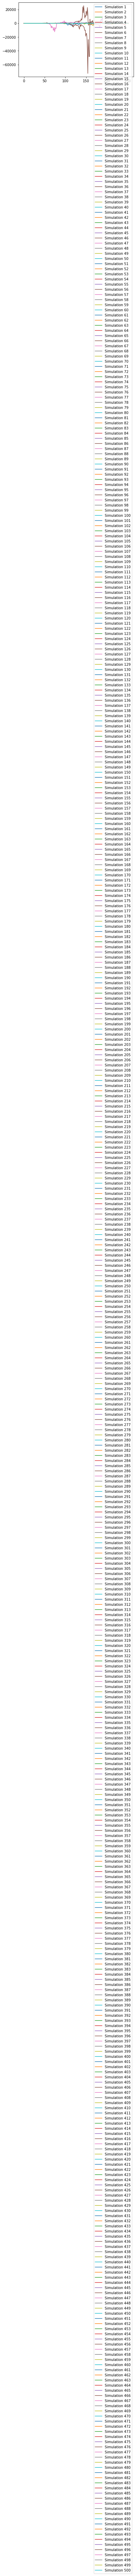

In [200]:
simulated_USA_confirmed_df.plot()